# Hamiltonian centre

## Dynamic Equations

Hamiltonian 

\begin{equation}
    H(q,p) = \frac{\omega}{2}(p^2 + q^2)
\end{equation}

Hamilton's equations (Hamiltonian vector field)

\begin{align*}
    \dot{q} &= \frac{\partial H}{\partial p} = \omega p \\
    \dot{p} &= -\frac{\partial H}{\partial q} = -\omega q
\end{align*}

Analytical solution for initial conditions $(q_0, p_0) \in \mathbb{R}^2$


\begin{equation*}
\begin{pmatrix}
    q(\Delta t)\\
    p(\Delta t)
\end{pmatrix}
    =
    \begin{pmatrix}
        \cos \omega \Delta t & \sin \omega \Delta t \\
        -\sin \omega \Delta t & \cos \omega \Delta t
    \end{pmatrix}
    \begin{pmatrix}
        q_0\\
        p_0
    \end{pmatrix}
\end{equation*}

Here, we define the _dynamic evolution operator_ as

\begin{equation}
A_0 =
    \begin{pmatrix}
        \cos \omega \Delta t & \sin \omega \Delta t \\
        -\sin \omega \Delta t & \cos \omega \Delta t
    \end{pmatrix}
\end{equation}

which clearly depends on $\omega$ and $\Delta t$

## Simulating orbits

Take $\omega = 1$ and $\Delta t = 1$

Define domain for I.Cs : $(q_0, p_0) \in [-1,1] \times[-1,1] \subset \mathbb{R}^2$

Define original _dynamic evolution operator_ $A_0$

In [127]:
import numpy

In [128]:
omega=1
dt=1

a_11 = numpy.cos(omega*dt)
a_12 = numpy.sin(omega*dt)
a_21 = -a_12
a_22 = a_11 

A_0 = numpy.matrix([
    [a_11, a_12],
    [a_21, a_22]
    ])

In [129]:
A_0

matrix([[ 0.54030231,  0.84147098],
        [-0.84147098,  0.54030231]])

In [130]:
def dynamics(x0,omega=1,dt=1):
    a_11 = numpy.cos(omega*dt)
    a_12 = numpy.sin(omega*dt)
    a_21 = -a_12
    a_22 = a_11 
    
    A = numpy.matrix([
        [a_11, a_12],
        [a_21, a_22]
        ])
    
    x = numpy.matmul(A, x0)
    return numpy.asarray(x)

Compute trajectories for $N$ iterations for all I.C.s

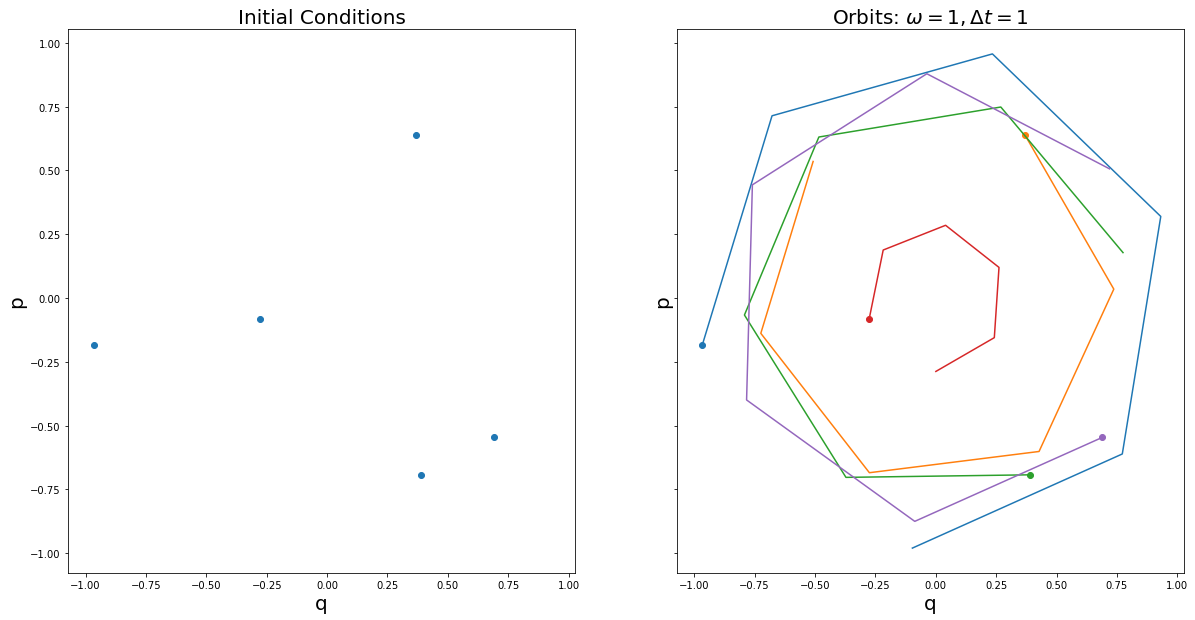

In [131]:
import matplotlib.pyplot as plt

N = 5 # number of ICs
x0 = 2*numpy.random.rand(2,N)-1 # Initial conditions
M = 5 # Number of iterations

fig,ax = plt.subplots(1,2,figsize=(20,10),sharex=True,sharey=True)

#################################################

# PLOT INITIAL CONDITIONS

#################################################
ax[0].scatter(*x0)
ax[0].set_title("Initial Conditions", fontsize=20)
ax[0].set_xlabel("q", fontsize=20)
ax[0].set_ylabel("p", fontsize=20)
#################################################

# PLOT ORBITS

#################################################
X  = [] # Orbits for M iterations
for n in range(M):
    X.append(x0)
    x = dynamics(x0)
    x0 = x

X.append(x0)
X = numpy.array(X).T

for n in range(N):
    x = X[n]
    q,p = numpy.array(x)
    ax[1].scatter(q[0],p[0])
    ax[1].plot(q,p)
    
ax[1].set_title("Orbits: $\omega = 1, \Delta t = 1$", fontsize=20)
ax[1].set_xlabel("q", fontsize=20)
ax[1].set_ylabel("p", fontsize=20)

plt.show()

## DMD APPLICATION: Proof of concept

### Construct trajectory matrices (DONE)

In [8]:
X

array([[[ 0.15024807, -0.37478011, -0.55523718, -0.22521175,
          0.31187233,  0.56222242],
        [-0.54186002, -0.41919761,  0.08887315,  0.51523435,
          0.46789146, -0.00962868]],

       [[-0.30733218,  0.37064123,  0.70784881,  0.39426345,
         -0.2818059 , -0.69878421],
        [ 0.63780395,  0.60321806,  0.01403627, -0.58805041,
         -0.64948625, -0.11378743]],

       [[ 0.40623213, -0.54204332, -0.99196664, -0.52988041,
          0.41937543,  0.98305943],
        [-0.90500027, -0.83080628,  0.00722717,  0.838616  ,
          0.89898514,  0.13283149]],

       [[ 0.12513714,  0.33507828,  0.23695   , -0.07902902,
         -0.32234912, -0.26930293],
        [ 0.31785576,  0.06643893, -0.24606154, -0.33233417,
         -0.11306029,  0.2101607 ]],

       [[-0.99618996, -0.29478084,  0.67764843,  1.02705085,
          0.43218746, -0.56002709],
        [ 0.28933011,  0.99459067,  0.78542915, -0.1458523 ,
         -0.94303783, -0.87319872]]])

In [9]:
# Reshape data matrix
D = 2
Y = X.reshape((D*N,M+1))

In [10]:
Y

array([[ 0.15024807, -0.37478011, -0.55523718, -0.22521175,  0.31187233,
         0.56222242],
       [-0.54186002, -0.41919761,  0.08887315,  0.51523435,  0.46789146,
        -0.00962868],
       [-0.30733218,  0.37064123,  0.70784881,  0.39426345, -0.2818059 ,
        -0.69878421],
       [ 0.63780395,  0.60321806,  0.01403627, -0.58805041, -0.64948625,
        -0.11378743],
       [ 0.40623213, -0.54204332, -0.99196664, -0.52988041,  0.41937543,
         0.98305943],
       [-0.90500027, -0.83080628,  0.00722717,  0.838616  ,  0.89898514,
         0.13283149],
       [ 0.12513714,  0.33507828,  0.23695   , -0.07902902, -0.32234912,
        -0.26930293],
       [ 0.31785576,  0.06643893, -0.24606154, -0.33233417, -0.11306029,
         0.2101607 ],
       [-0.99618996, -0.29478084,  0.67764843,  1.02705085,  0.43218746,
        -0.56002709],
       [ 0.28933011,  0.99459067,  0.78542915, -0.1458523 , -0.94303783,
        -0.87319872]])

Pairs of rows of this matrix represent

\begin{equation}
\left\{
\left(
\begin{array}{c}
x_0 \\ y_0
\end{array}
\right), \, 
A \left(
\begin{array}{c}
x_0 \\ y_0
\end{array}
\right), \, 
A^2 \left(
\begin{array}{c}
x_0 \\ y_0
\end{array}
\right), \ldots ,
A^n \left(
\begin{array}{c}
x_0 \\ y_0
\end{array}
\right)
\right\},
\end{equation}

In [11]:
Y_back = Y[:].T[:M].T
Y_forth = Y[:].T[1:M+1].T

Then, the matrix below represents $D_0^{n-1}$ 

In [12]:
Y_back

array([[ 0.15024807, -0.37478011, -0.55523718, -0.22521175,  0.31187233],
       [-0.54186002, -0.41919761,  0.08887315,  0.51523435,  0.46789146],
       [-0.30733218,  0.37064123,  0.70784881,  0.39426345, -0.2818059 ],
       [ 0.63780395,  0.60321806,  0.01403627, -0.58805041, -0.64948625],
       [ 0.40623213, -0.54204332, -0.99196664, -0.52988041,  0.41937543],
       [-0.90500027, -0.83080628,  0.00722717,  0.838616  ,  0.89898514],
       [ 0.12513714,  0.33507828,  0.23695   , -0.07902902, -0.32234912],
       [ 0.31785576,  0.06643893, -0.24606154, -0.33233417, -0.11306029],
       [-0.99618996, -0.29478084,  0.67764843,  1.02705085,  0.43218746],
       [ 0.28933011,  0.99459067,  0.78542915, -0.1458523 , -0.94303783]])

And the matrix below represents $D_1^{n}$ 

In [13]:
Y_forth

array([[-0.37478011, -0.55523718, -0.22521175,  0.31187233,  0.56222242],
       [-0.41919761,  0.08887315,  0.51523435,  0.46789146, -0.00962868],
       [ 0.37064123,  0.70784881,  0.39426345, -0.2818059 , -0.69878421],
       [ 0.60321806,  0.01403627, -0.58805041, -0.64948625, -0.11378743],
       [-0.54204332, -0.99196664, -0.52988041,  0.41937543,  0.98305943],
       [-0.83080628,  0.00722717,  0.838616  ,  0.89898514,  0.13283149],
       [ 0.33507828,  0.23695   , -0.07902902, -0.32234912, -0.26930293],
       [ 0.06643893, -0.24606154, -0.33233417, -0.11306029,  0.2101607 ],
       [-0.29478084,  0.67764843,  1.02705085,  0.43218746, -0.56002709],
       [ 0.99459067,  0.78542915, -0.1458523 , -0.94303783, -0.87319872]])

__TEST__ Show that $D_1^n = A_0 D_0^{n-1}$

Below, we show how the _dynamic evolution operator_ ($A_0$) maps the rows of $D_0^{n-1}$ to the rows of $D_1^n$.

In [14]:
numpy.dot(A_0, Y_back[:2,:])

matrix([[-0.37478011, -0.55523718, -0.22521175,  0.31187233,  0.56222242],
        [-0.41919761,  0.08887315,  0.51523435,  0.46789146, -0.00962868]])

In [15]:
numpy.allclose(Y_forth[:2,:], numpy.dot(A_0, Y_back[:2,:]))

True

### SVD of back snapshots matrix (REVISE!)

<span style='color:red'><b>NOTE</b></span> Shoudl I include this section? It seems that the computation step of the pseudo-inverse can be replaced by this.

Compute SVD of $D_0^{n-1}$ to obtain 

\begin{equation}
    D_0^{n-1}= U \Sigma V^T
\end{equation}

In [17]:
U, S, Vh = numpy.linalg.svd(Y_back, full_matrices=True)
U.shape, S.shape, Vh.shape

((10, 10), (5,), (5, 5))

__NOTE__

SVD computation is performed using the _LAPACK_ routine. See details in documentation
https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.svd.html

In [18]:
U

array([[ 0.05135991,  0.32087229,  0.40966509,  0.63774695,  0.25046739,
        -0.11345207,  0.21019578, -0.15641942,  0.40797734,  0.09568892],
       [ 0.32087229, -0.05135991, -0.80813346,  0.39026065, -0.03992072,
        -0.01986278,  0.11638381,  0.03264354,  0.11600922,  0.24282286],
       [ 0.00811158, -0.40906675, -0.0141208 ,  0.23630128,  0.49207628,
        -0.53420508, -0.05875062, -0.07045751, -0.42405707, -0.24658969],
       [-0.40906675, -0.00811158, -0.23582103,  0.28882633, -0.03760763,
         0.30536134, -0.43088234, -0.35542688,  0.15702587, -0.51211476],
       [ 0.00417659,  0.57325881, -0.09661406, -0.09707228, -0.17287177,
        -0.4475865 , -0.3506906 , -0.42307571, -0.25714375,  0.2329837 ],
       [ 0.57325881, -0.00417659,  0.2411343 ,  0.26822495, -0.08505413,
         0.48312347, -0.19572518, -0.13861481, -0.49286781, -0.01352525],
       [-0.14219929, -0.13693371,  0.04513055,  0.16408045, -0.60437526,
        -0.13533563,  0.59815765, -0.31538571

Check if matrices a identical within numeric accuracy

In [19]:
numpy.allclose(Y_back, numpy.dot(U[:, :5] * S, Vh))

True

The above shows the reconstruction of $D_0^{n-1}$ from its SVD matrices.

__NOTE__ See documenation for details of algorithm for element-wise comparison of matrices
https://docs.scipy.org/doc/numpy/reference/generated/numpy.allclose.html 

### Compute Pseudo-inverse of snapshots matrix (DONE)

Original snapshot matrix $Y = D_0^{n-1}$

In [20]:
Y_back

array([[ 0.15024807, -0.37478011, -0.55523718, -0.22521175,  0.31187233],
       [-0.54186002, -0.41919761,  0.08887315,  0.51523435,  0.46789146],
       [-0.30733218,  0.37064123,  0.70784881,  0.39426345, -0.2818059 ],
       [ 0.63780395,  0.60321806,  0.01403627, -0.58805041, -0.64948625],
       [ 0.40623213, -0.54204332, -0.99196664, -0.52988041,  0.41937543],
       [-0.90500027, -0.83080628,  0.00722717,  0.838616  ,  0.89898514],
       [ 0.12513714,  0.33507828,  0.23695   , -0.07902902, -0.32234912],
       [ 0.31785576,  0.06643893, -0.24606154, -0.33233417, -0.11306029],
       [-0.99618996, -0.29478084,  0.67764843,  1.02705085,  0.43218746],
       [ 0.28933011,  0.99459067,  0.78542915, -0.1458523 , -0.94303783]])

Moore-Penrose pseudo-inverse $Y^+$

In [21]:
Y_back_pinv = numpy.linalg.pinv(Y_back)

In [22]:
Y_back_pinv

array([[ 0.03118689, -0.06132577, -0.05235564,  0.06901305,  0.07070945,
        -0.09865034,  0.00728049,  0.04115732, -0.12649091,  0.01048303],
       [-0.06004203, -0.04252129,  0.06488795,  0.06611266, -0.09339514,
        -0.09013461,  0.04467702, -0.0013112 , -0.00855299,  0.13546124],
       [-0.09606859,  0.01537707,  0.12247386,  0.00242859, -0.17163267,
         0.00125046,  0.04099771, -0.04257421,  0.11724851,  0.13589701],
       [-0.04377013,  0.05913782,  0.06745787, -0.06348831, -0.09207191,
         0.09148587, -0.00037471, -0.04469469,  0.13525227,  0.0113897 ],
       [ 0.04877039,  0.04852753, -0.04957858, -0.07103436,  0.07213934,
         0.09760959, -0.04140262, -0.00572307,  0.02890572, -0.12358925]])

In [23]:
Y_back_pinv.shape

(5, 10)

__TEST__: Verify $Y = Y Y^+ Y$

In [24]:
# Verify the above property
numpy.allclose(Y_back, numpy.dot(Y_back, numpy.dot(Y_back_pinv, Y_back)))

True

__TEST__: Verify that $ (Y' Y^+) Y = A_1 Y \approx Y' = A_0 Y$

In [25]:
A_1 = numpy.dot(Y_forth, Y_back_pinv)
A_1

array([[ 0.05705423,  0.0888567 , -0.05082484, -0.12285723,  0.07585333,
         0.17014686, -0.06016244, -0.02226538,  0.08418236, -0.17568007],
       [-0.0888567 ,  0.05705423,  0.12285723, -0.05082484, -0.17014686,
         0.07585333,  0.02226538, -0.06016244,  0.17568007,  0.08418236],
       [-0.09056316, -0.09734155,  0.09044736,  0.14086342, -0.13203371,
        -0.19386185,  0.07952402,  0.01413543, -0.06502392,  0.23650328],
       [ 0.09734155, -0.09056316, -0.14086342,  0.09044736,  0.19386185,
        -0.13203371, -0.01413543,  0.07952402, -0.23650328, -0.06502392],
       [ 0.12314798,  0.13977931, -0.12133267, -0.20073291,  0.17756663,
         0.27654364, -0.11084672, -0.02281912,  0.10005766, -0.32878347],
       [-0.13977931,  0.12314798,  0.20073291, -0.12133267, -0.27654364,
         0.17756663,  0.02281912, -0.11084672,  0.32878347,  0.10005766],
       [ 0.00479055, -0.06397122, -0.02024036,  0.0781934 ,  0.02537915,
        -0.11028874,  0.02105638,  0.03279337

In [26]:
numpy.allclose(Y_forth, numpy.dot(A_1, Y_back))

True

__NOTE__ $A_1$ doesn't have a block matrix structure like $A_0$.

### SVD of Pseudo-inverse of Snapshots matrix (DONE)

The pseudo-inverse $Y^+$ is computed via the SVD of $Y$.

Since, 

\begin{equation*}
    (A B)^+ = B^+ A^+
\end{equation*}

for any two matrices.

And $U^+ = U^T$, for $U$ square unitary matrix ($U U^T = U^T U = I$).

Then,

\begin{equation}
    Y^+ = (U \Sigma V^T)+ = V \Sigma^+ U^T
\end{equation}

In [27]:
V, S_pinv, Uh = numpy.linalg.svd(Y_back_pinv, full_matrices=True)
Y_back_pinv.shape, V.shape, S_pinv.shape, Uh.shape

((5, 10), (5, 5), (5,), (10, 10))

__TEST__: Verify $Y^+ = V \Sigma^+ U^T$

In [28]:
numpy.allclose(Y_back_pinv, numpy.linalg.multi_dot([V, numpy.diag(S_pinv), Uh[:5]]))

True

__NOTE__ To reconstruct the PS of $Y$, only the first 5 columns  of $U$ (out of 400) were used. 

### Truncate decomposition matrices (DONE)

Since some of the singular values of $\Sigma$ will be zero. We can further truncate all the decomposition matrices to reconstruct $Y^+$

Then, we define lower-rank matrices $U_r, \Sigma_r^+, V_r$, with $r = rank \leq n$

In [29]:
U_r = Uh[:2].T
S_pinv_r = numpy.diag(S_pinv[:2])
V_r = V[:, :2]

In [30]:
Y_back_pinv.shape, V_r.shape, S_pinv_r.shape, U_r.T.shape

((5, 10), (5, 2), (2, 2), (2, 10))

__TEST__: Verify $Y^+ = V_r \Sigma_r^+ U_r^T$

In [31]:
numpy.allclose(Y_back_pinv, numpy.linalg.multi_dot([V_r, S_pinv_r, U_r.T]))

True

### Data-based evolution operator (DONE)

The data-reconstructred dynamical evolution operator $A$ is computed by

\begin{equation}
    A_0 \approx Y' Y^+ = Y \left( V_r \Sigma_{r}^{+} U_{r}^T \right) = A_{DMD}
\end{equation}


In [32]:
Y_forth.shape, V_r.shape, S_pinv_r.shape, U_r.T.shape

((10, 5), (5, 2), (2, 2), (2, 10))

Next, we define the DMD _dynamical evolution operator_ $A_{DMD}$

In [33]:
A_dmd = numpy.linalg.multi_dot([Y_forth, V_r, S_pinv_r, U_r.T])

In [34]:
A_dmd

array([[ 0.05705423,  0.0888567 , -0.05082484, -0.12285723,  0.07585333,
         0.17014686, -0.06016244, -0.02226538,  0.08418236, -0.17568007],
       [-0.0888567 ,  0.05705423,  0.12285723, -0.05082484, -0.17014686,
         0.07585333,  0.02226538, -0.06016244,  0.17568007,  0.08418236],
       [-0.09056316, -0.09734155,  0.09044736,  0.14086342, -0.13203371,
        -0.19386185,  0.07952402,  0.01413543, -0.06502392,  0.23650328],
       [ 0.09734155, -0.09056316, -0.14086342,  0.09044736,  0.19386185,
        -0.13203371, -0.01413543,  0.07952402, -0.23650328, -0.06502392],
       [ 0.12314798,  0.13977931, -0.12133267, -0.20073291,  0.17756663,
         0.27654364, -0.11084672, -0.02281912,  0.10005766, -0.32878347],
       [-0.13977931,  0.12314798,  0.20073291, -0.12133267, -0.27654364,
         0.17756663,  0.02281912, -0.11084672,  0.32878347,  0.10005766],
       [ 0.00479055, -0.06397122, -0.02024036,  0.0781934 ,  0.02537915,
        -0.11028874,  0.02105638,  0.03279337

In [35]:
A_dmd.shape

(10, 10)

__TEST__ : $A_{DMD} Y \approx Y'$ 

In [36]:
numpy.allclose(Y_forth, numpy.dot(A_dmd, Y_back))

True

### Rank-reduced data-based evolution operator (DONE)

So far, we have shown that 

\begin{equation*}
    Y' = A_{DMD} Y
\end{equation*}

However, $A_{DMD} \neq block(A_0)$.


Now, we define a rank-reduced version of $A_{DMD}$ - namely $\tilde{A}_{DMD} \in \mathbb{R}^{r \times r}$, obtained by projecting the latter onto the $U_r$ modes.

\begin{equation}
    \tilde{A}_{DMD} = U_r^T A_{DMD} U_r
\end{equation}

__NOTE__ The above represents a similarity transformation, hence $A_{DMD}$ and $\tilde{A}_{DMD}$ should have the same _eigenvalues_.

See https://en.wikipedia.org/wiki/Matrix_similarity

In [37]:
U_r.T.shape, A_dmd.shape, U_r.shape

((2, 10), (10, 10), (10, 2))

In [38]:
A_dmd_r = numpy.linalg.multi_dot([U_r.T, A_dmd, U_r])
A_dmd_r

array([[ 0.54030231, -0.84147098],
       [ 0.84147098,  0.54030231]])

In [39]:
A_dmd_r.shape

(2, 2)

Then, we compare with the original matrix $A_0$

In [40]:
A_0

matrix([[ 0.54030231,  0.84147098],
        [-0.84147098,  0.54030231]])

<span style='color:red'>__NOTE__ </span> $A_0 = \tilde{A}_{DMD}^T$

### DMD modes (DONE)

The DMD modes will only be the eigenvectors of $\tilde{A}_{DMD}$, which are identical to the eigenvectors of $A_0$.

So, the DMD modes will be computed from solving the eigendecomposition problem

\begin{equation}
    \tilde{A}_{DMD} W = W \Lambda
\end{equation}

where $\Lambda$ is the diagonal matrix containing $\lambda$ eigenvalues and $W$ is a matrix with eigenvectors $w$ as columns, also called _DMD modes_

__TEST__ If $\tilde{A}_{DMD} W = W \Lambda$, then $A_0 W = W \Lambda$

In [44]:
Lambda, W = numpy.linalg.eig(A_dmd_r)

In [45]:
W

array([[7.07106781e-01+0.j        , 7.07106781e-01-0.j        ],
       [1.34015774e-16-0.70710678j, 1.34015774e-16+0.70710678j]])

In [46]:
Lambda

array([0.54030231+0.84147098j, 0.54030231-0.84147098j])

Compare with the eigen-decomposition of $A_0$

In [47]:
numpy.linalg.eig(A_0)

(array([0.54030231+0.84147098j, 0.54030231-0.84147098j]),
 matrix([[0.70710678+0.j        , 0.70710678-0.j        ],
         [0.        +0.70710678j, 0.        -0.70710678j]]))

## DMD IMPLEMENTATION: Computational script

In [132]:
def dmd(X): 
    """Compute DMD from input trajectory-data list X"""
    N_trajs, PS_dimension, N_snapshots = X.shape 
    
    # Reshape trajectory data as matrix
    Y = X.reshape((PS_dimension*N_trajs, N_snapshots))

    # Define backward and forward snapshot matrices: (Y, Y')
    Y_back = Y[:].T[:N_snapshots-1].T
    Y_forth = Y[:].T[1:N_snapshots].T

    # Compute Moore-Penrose pseudoinverse of Y: Y^+
    Y_back_pinv = numpy.linalg.pinv(Y_back)

    # Compute SVD matrices of Y^+
    V, S_pinv, Uh = numpy.linalg.svd(Y_back_pinv, full_matrices=True)
    
    # Determine matrix rank for reduction
    threshold = 1e-3 # To remove zero singular values
    rank = sum(S_pinv >= tolerance)

    # Define low-rank matrices
    U_r = Uh[:rank].T
    S_pinv_r = numpy.diag(S_pinv[:rank])
    V_r = V[:, :rank]

    # Data-based dynamical evolution operator
    A_dmd = numpy.linalg.multi_dot([Y_forth, V_r, S_pinv_r, U_r.T])

    # Rank-reduced data-based dynamical evolution operator
    A_dmd_r = numpy.linalg.multi_dot([U_r.T, A_dmd, U_r])
    
    return A_dmd_r.T

In [133]:
dmd(X)

array([[ 0.54030231,  0.84147098],
       [-0.84147098,  0.54030231]])

In [134]:
A_0

matrix([[ 0.54030231,  0.84147098],
        [-0.84147098,  0.54030231]])

FEATURES

* Add checks on matrix dimensions in code
* Use a threshold to remove zero singular values automatically

TESTS

* Compare output with PyDMD

# Hamiltonian saddle

## Dynamic Equations

Hamiltonian 

\begin{equation}
    H(q,p) = \frac{\lambda}{2}(p^2 - q^2)
\end{equation}

Hamilton's equations (Hamiltonian vector field)

\begin{align*}
    \dot{q} &= \frac{\partial H}{\partial p} = \lambda p \\
    \dot{p} &= -\frac{\partial H}{\partial q} = \lambda q
\end{align*}

Analytical solution for initial conditions $(q_0, p_0) \in \mathbb{R}^2$


\begin{equation*}
\begin{pmatrix}
    q(\Delta t)\\
    p(\Delta t)
\end{pmatrix}
    =
    \begin{pmatrix}
        \cosh \lambda \Delta t & \sinh \lambda \Delta t \\
        \sinh \lambda \Delta t & \cosh \lambda \Delta t
    \end{pmatrix}
    \begin{pmatrix}
        q_0\\
        p_0
    \end{pmatrix}
\end{equation*}

## Simulating orbits

Take $\lambda = 1$ and $\Delta t = 1$

Define domain for I.Cs : $(q_0, p_0) \in [-1,1] \times[-1,1] \subset \mathbb{R}^2$

In [135]:
l=1
dt=0.1
a_11 = numpy.cosh(l*dt)
a_12 = numpy.sinh(l*dt)
a_21 = a_12
a_22 = a_11 

A_0 = numpy.matrix([
    [a_11, a_12],
    [a_21, a_22]
    ])

In [136]:
A_0

matrix([[1.00500417, 0.10016675],
        [0.10016675, 1.00500417]])

In [137]:
import numpy

def dynamics(x0,l=1,dt=0.1):
    a_11 = numpy.cosh(l*dt)
    a_12 = numpy.sinh(l*dt)
    a_21 = a_12
    a_22 = a_11 
    
    A = numpy.matrix([
        [a_11, a_12],
        [a_21, a_22]
        ])
    
    x = numpy.matmul(A, x0)
    return numpy.asarray(x)

Compute trajectories for $N$ iterations for all I.C.s

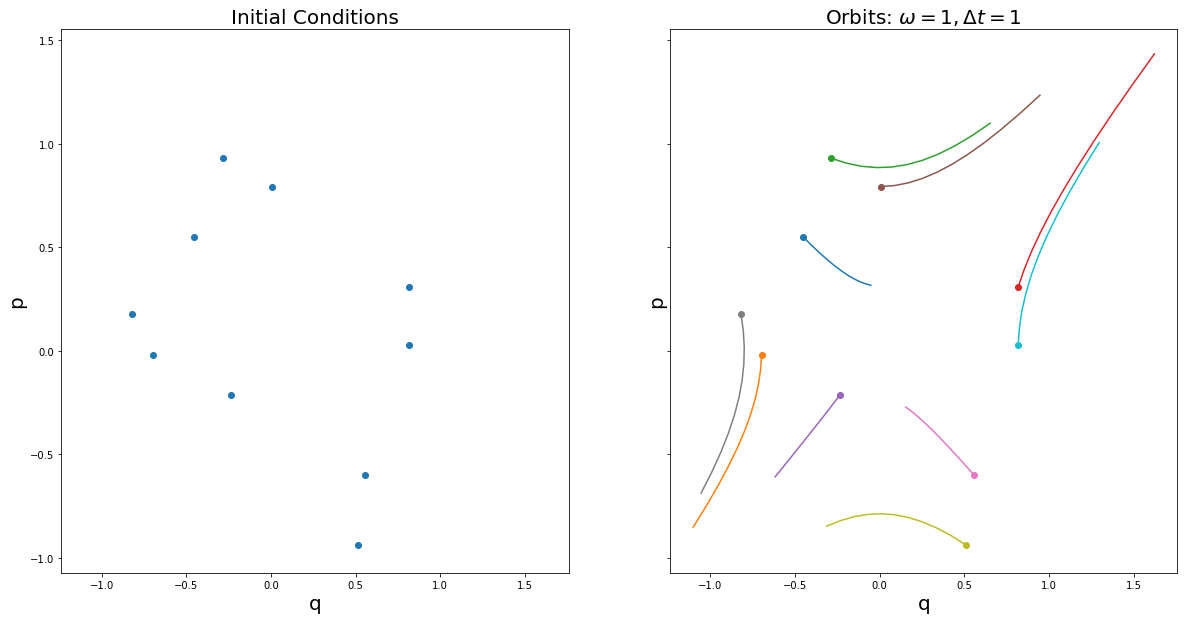

In [138]:
import matplotlib.pyplot as plt

N = 10 # number of ICs
x0 = 2*numpy.random.rand(2,N)-1 # Initial conditions
M = 10

fig,ax = plt.subplots(1,2,figsize=(20,10),sharex=True,sharey=True)

#################################################

# PLOT INITIAL CONDITIONS

#################################################
ax[0].scatter(*x0)
ax[0].set_title("Initial Conditions", fontsize=20)
ax[0].set_xlabel("q", fontsize=20)
ax[0].set_ylabel("p", fontsize=20)
#################################################

# PLOT ORBITS

#################################################
X  = [] # Orbits for M iterations
for n in range(M):
    X.append(x0)
    x = dynamics(x0)
    x0 = x

X.append(x0)
X = numpy.array(X).T

for n in range(N):
    x = X[n]
    q,p = numpy.array(x)
    ax[1].scatter(q[0],p[0])
    ax[1].plot(q,p)
    
ax[1].set_title("Orbits: $\omega = 1, \Delta t = 1$", fontsize=20)
ax[1].set_xlabel("q", fontsize=20)
ax[1].set_ylabel("p", fontsize=20)

plt.show()

In [139]:
A_0

matrix([[1.00500417, 0.10016675],
        [0.10016675, 1.00500417]])

## Dynamical evolution operator: reconstruction

In [140]:
dmd(X)

array([[ 0.94920008, -0.08318222],
       [-0.08318222,  1.06080825]])

In [141]:
numpy.linalg.eig(A_0)

(array([1.10517092, 0.90483742]), matrix([[ 0.70710678, -0.70710678],
         [ 0.70710678,  0.70710678]]))

In [148]:
numpy.linalg.eig(dmd(X).T)

(array([0.90483742, 1.10517092]), array([[-0.88235817,  0.47057844],
        [-0.47057844, -0.88235817]]))

__NOTE__ These matrices have identical eigenvalues, this means that $A_0$ and $\tilde{A}_{DMD}$ are similar. 

See https://math.stackexchange.com/questions/556257/show-that-two-matrices-with-the-same-eigenvalues-are-similar

# Hamiltonian saddle-centre

## Dynamic Equations

Hamiltonian 

\begin{equation}
    H(q_1,p_1,q_2,p_2) = \underbrace{H_1}_\text{reaction} + \underbrace{H_2}_\text{bath}
\end{equation}

\begin{equation}
    H_1(q_1,p_1) = \frac{\lambda}{2}(p_1^2 - q_2^2)\\
    H_2(q_2,p_2) = \frac{\omega}{2}(p_2^2 + q_2^2)
\end{equation}

Hamilton's equations (Hamiltonian vector field)

\begin{align*}
    \dot{q} &= \frac{\partial H}{\partial p} = \lambda p \\
    \dot{p} &= -\frac{\partial H}{\partial q} = \lambda q
\end{align*}

## Simulating orbits (NOT READY)

## Dynamical evolution operator: reconstruction

Research
* Recovery PS structures
* SVD numerical algorithm - check analytically
* Koopman operator - applied to CAT map? 
* DMD of CAT map?

Book
* Fix Ches 1